In [1]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
#from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
import seaborn as sns

In [5]:
import os
path = os.getcwd()
dataset_path = os.path.join(path, 'dataset')

In [7]:
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)
data = []
labels = []

In [8]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

In [10]:
labels_train_unique = np.unique(np.array(labels))

In [11]:
food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

In [12]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[0:3])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [13]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1876, 224, 224, 3)
(805, 224, 224, 3)
(1876, 15)
(805, 15)


In [14]:
import tensorflow_hub as hub
import matplotlib.pylab as plt

In [15]:
#mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
mobilenet = os.path.join(path, "tf2-preview_mobilenet_v2_classification_4")

In [16]:
mobilenet_layers = hub.KerasLayer(mobilenet, input_shape=(224,224,3))

In [17]:
mobilenet_layers.trainable = False

In [18]:
model=tf.keras.models.Sequential([
    mobilenet_layers,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 128)               128256    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 3,670,456
Trainable params: 130,191
Non-trainable params: 3,540,265
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
59/59 [==============================] - 7s 114ms/step - loss: 1.9192 - accuracy: 0.3902 - val_loss: 1.4236 - val_accuracy: 0.5913
Epoch 2/20
59/59 [==============================] - 4s 71ms/step - loss: 1.3983 - accuracy: 0.5720 - val_loss: 1.0767 - val_accuracy: 0.6944
Epoch 3/20
59/59 [==============================] - 4s 69ms/step - loss: 1.0888 - accuracy: 0.6711 - val_loss: 0.8732 - val_accuracy: 0.7478
Epoch 4/20
59/59 [==============================] - 4s 76ms/step - loss: 0.8990 - accuracy: 0.7148 - val_loss: 0.7415 - val_accuracy: 0.7814
Epoch 5/20
59/59 [==============================] - 4s 76ms/step - loss: 0.7329 - accuracy: 0.7751 - val_loss: 0.6506 - val_accuracy: 0.8112
Epoch 6/20
59/59 [==============================] - 4s 69ms/step - loss: 0.6549 - accuracy: 0.7905 - val_loss: 0.5894 - val_accuracy: 0.8335
Epoch 7/20
59/59 [==============================] - 4s 73ms/step - loss: 0.5830 - accuracy: 0.8172 - val_loss: 0.5459 - val_accuracy: 0.8348
Epoch 8/20
5

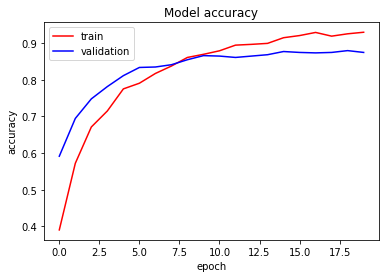

In [25]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.savefig('model.png')
plt.show()

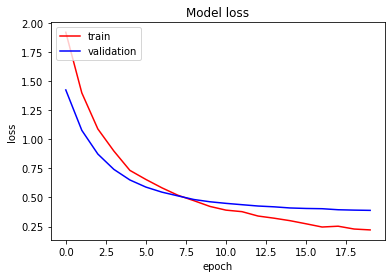

In [26]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('model.png')
plt.show()

In [27]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3893848955631256
Test accuracy: 0.8745341897010803


In [28]:
model.save('model.h5')

# TESTING IMAGE

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np


In [14]:
#LOAD MODEL
model = os.path.join('model.h5')
model = tf.keras.models.load_model(model, custom_objects={'KerasLayer':hub.KerasLayer})

In [15]:
path = os.getcwd()
dataset_path = os.path.join(path, 'dataset')

temp = []
label ={}

for i in os.listdir(dataset_path):
    temp.append(i)

for i in range(len(temp)):
    label[temp[i]] = i

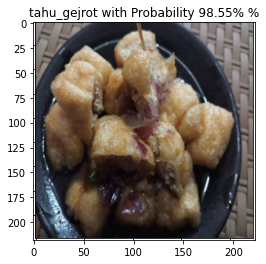

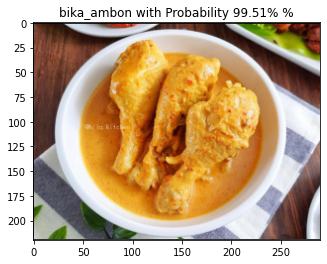

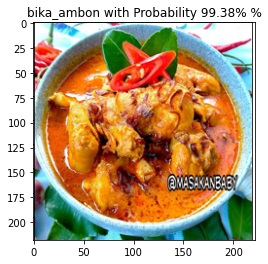

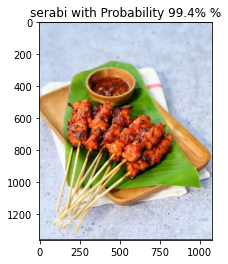

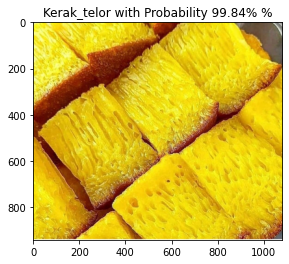

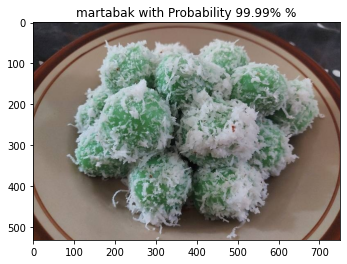

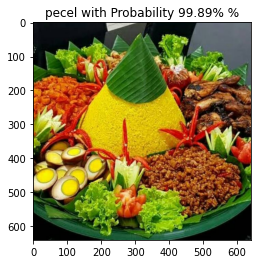

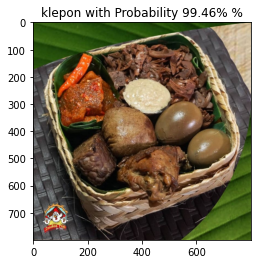

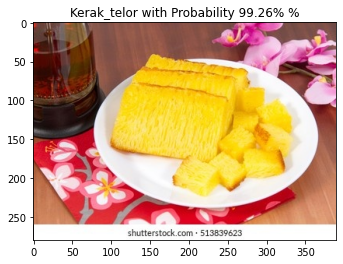

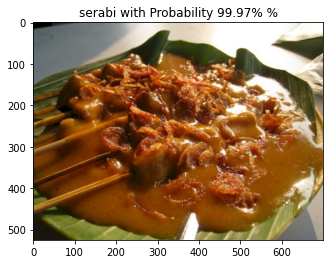

In [17]:
image_path = os.path.join(os.getcwd(), 'test_image')

test = []

for a in os.listdir (image_path):
    images = os.path.join(image_path, a)
    images = image.load_img(images, target_size=(224, 224))
    img = image.img_to_array(images)
    img = np.expand_dims(img, axis=0)
    processed_image = np.array(img, dtype='float') / 225.0
    pred = model.predict(processed_image)
 

    i = 0
    i_max=-1
    max_val = ""

    for (k, result) in enumerate(label.keys()):

        if (pred[i][k] > i_max):
            i_max = pred[i][k]
            max_val = result

        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"

    gambar = mpimg.imread(os.path.join(image_path, a))
    plt.figure()
    plt.imshow(gambar)
    plt.title(txt)